# Classification Model Evaluation

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

## Model Selection Process

### Data Cleaning and Preparation

In [2]:
# Read data
diabetes = pd.read_csv('datasets/diabetes.csv')
diabetes.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [3]:
# Dimensions of the data set
print(diabetes.shape)

(768, 9)


In [4]:
# Remove unusual rows of data
diabetes_mod = diabetes[(diabetes.BloodPressure != 0) & (diabetes.BMI != 0) & (diabetes.Glucose != 0)]

# Dimensions of data set after cleansing
print(diabetes_mod.shape)

(724, 9)


### Feature Selection

In [5]:
# Features/Response
feature_names = ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction']
X = diabetes_mod[feature_names]
y = diabetes_mod.Outcome

### Model Selection

In [6]:
logreg = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

## Model Evaluation Procedures

### 01. Train/Test Split

In [7]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy {}".format(accuracy))

Accuracy 0.7955801104972375


### 02. K-Fold Cross Validation

In [8]:
accuracy = cross_val_score(logreg, X, y, cv = 10, scoring='accuracy').mean()

print("Accuracy {}".format(accuracy))

Accuracy 0.7805877119643279


## Model Evaluation Metrics

### 01. Classification Accuracy

We already discussed how classification accuracy works in the previous section.

### 02. Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix

In [10]:
# Method to plot the confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [11]:
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[108  11]
 [ 26  36]]


Confusion matrix, without normalization
[[108  11]
 [ 26  36]]


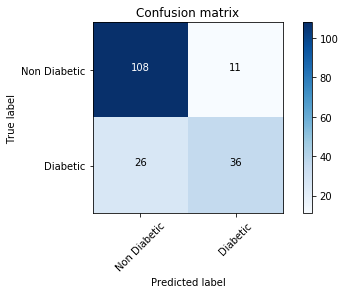

In [12]:
plot_confusion_matrix(confusion, classes=['Non Diabetic', 'Diabetic'], title='Confusion matrix')

In [13]:
# True Positives
TP = confusion[1, 1]

# True Negatives
TN = confusion[0, 0] 

# False Positives
FP = confusion[0, 1] 

# False Negatives
FN = confusion[1, 0] 

### 03. Metrics computed from the Confusion Matrix

In [14]:
from sklearn.metrics import recall_score, precision_score

#### Classification accuracy

In [15]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, y_pred))

0.7955801104972375
0.7955801104972375


#### Sensitivity/Recall

In [16]:
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred))

0.5806451612903226
0.5806451612903226


#### Specificity

In [17]:
print(TN / float(TN + FP))

0.907563025210084


#### False Positive Rate

In [18]:
print(FP / float(TN + FP))

0.09243697478991597


#### Precision

In [19]:
print(TP / float(TP + FP))
print(precision_score(y_test, y_pred))

0.7659574468085106
0.7659574468085106


### Adjusting Classification Threshold

In [20]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [21]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.80085377, 0.19914623],
       [0.70450063, 0.29549937],
       [0.81765257, 0.18234743],
       [0.45582948, 0.54417052],
       [0.32622925, 0.67377075],
       [0.79674719, 0.20325281],
       [0.74752722, 0.25247278],
       [0.64438483, 0.35561517],
       [0.62830673, 0.37169327],
       [0.69703945, 0.30296055]])

In [22]:
# store the predicted probabilities for class 1 (diabetic)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

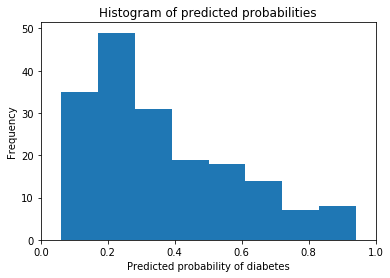

In [23]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8, linewidth=1.2)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

Decrease the threshold for predicting diabetes in order to increase the sensitivity of the classifier

In [24]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize

y_pred_class = binarize([y_pred_prob], 0.3)[0]

In [25]:
# previous confusion matrix (default threshold of 0.5)
print(confusion)

[[108  11]
 [ 26  36]]


In [26]:
# new confusion matrix (threshold of 0.3)
confusion_new = confusion_matrix(y_test, y_pred_class)
print(confusion_new)

[[82 37]
 [ 8 54]]


In [27]:
# True Positives
TP = confusion_new[1, 1]

# True Negatives
TN = confusion_new[0, 0] 

# False Positives
FP = confusion_new[0, 1] 

# False Negatives
FN = confusion_new[1, 0] 

In [28]:
# sensitivity has increased
print(TP / float(TP + FN))
print(recall_score(y_test, y_pred_class))

0.8709677419354839
0.8709677419354839


In [29]:
# specificity has decreased
print(TN / float(TN + FP))

0.6890756302521008


### 04. ROC Curves and Area Under the Curve (AUC)

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

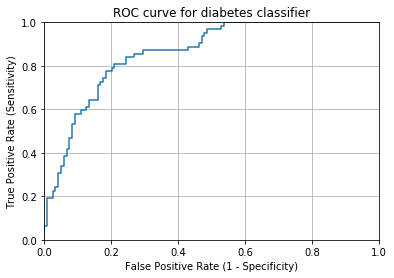

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [32]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [33]:
evaluate_threshold(0.3)

Sensitivity: 0.8709677419354839
Specificity: 0.7058823529411764


In [34]:
evaluate_threshold(0.5)

Sensitivity: 0.5806451612903226
Specificity: 0.907563025210084


In [35]:
print(roc_auc_score(y_test, y_pred_prob))

0.8587693141772839


In [36]:
# calculate cross-validated AUC
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

0.8374308510638298